<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1') # Encoding ile UTF-8'e uygun hale getirdik.

<IPython.core.display.Javascript object>

In [3]:
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

<IPython.core.display.Javascript object>

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [4]:
df_male.head().T

0               1               2                       3                       4
subjectid                              10027           10032           10033                   10092                   10093
abdominalextensiondepthsitting           266             233             287                     234                     250
acromialheight                          1467            1395            1430                    1347                    1585
acromionradialelength                    337             326             341                     310                     372
anklecircumference                       222             220             230                     230                     247
axillaheight                            1347            1293            1327                    1239                    1478
balloffootcircumference                  253             245             256                     262                     267
balloffootlength                         202             193             196                     199                     224
biacromialbreadth                        401             394             427                     401                     435
bicepscircumferenceflexed                369             338             408                     359                     356
bicristalbreadth                         274             257             261                     262                     263
bideltoidbreadth                         493             479             544                     518                     524
bimalleolarbreadth                        71              67              75                      73                      80
bitragionchinarc                         319             344             345                     328                     340
bitragionsubmandibulararc                291             320             330                     309                     310
bizygomaticbreadth                       142             135             135                     143                     138
buttockcircumference                     979             944            1054                     991                    1029
buttockdepth                             240             232             258                     242                     275
buttockheight                            882             870             901                     821                    1080
buttockkneelength                        619             584             623                     560                     706
buttockpopliteallength                   509             468             506                     437                     567
calfcircumference                        373             357             412                     395                     425
cervicaleheight                         1535            1471            1501                    1423                    1684
chestbreadth                             291             269             288                     296                     304
chestcircumference                      1074            1021            1120                    1114                    1048
chestdepth                               259             253             267                     262                     232
chestheight                             1292            1244            1288                    1205                    1452
crotchheight                             877             851             854                     769                    1014
crotchlengthomphalion                    607             615             636                     590                     682
crotchlengthposterioromphalion           351             376             359                     341                     382
earbreadth                                36              33              40                      39                      32
earlength                                 7

In [5]:
df_female.T

0                       1                       2                       3             4                       5                       6                       7                       8                       9                       10                      11                      12                      13                      14              15                      16              17                      18                      19              20              21              22              23                      24                      25                      26              27                      28              29                      30              31                           32                      33              34              35              36              37                      38              39              40              41              42              43                      44                      45              46    \
SubjectId                                10037                   10038                   10042                   10043         10051                   10053                   10061                   10070                   10077                   10080                   10095                   10101                   10105                   10111                   10121           10127                   10129           10131                   10136                   10138           10149           10158           10173           10175                   10196                   10210                   10222           11394                   11395           11396                   11397           11404                        11405                   11407           11410           11510           11513           11519                   11523           11525           11528           11529           11530           11533                   11537                   11593           11742   
abdominalextensiondepthsitting             231                     194                     183                     261           309                     272                     261                     229                     213                     281                     274                     284                     279                     214                     265             225                     193             201                     233                     214             325             245             181             236                     226                     300                     207             270                     246             209                     256             235                          266                     305             326             205             243             197                     298             287             352             241             274             289                     246                     277             230   
acromialheight                            1282                    1379                    1369                    1356          1303                    1428                    1352                    1383                    1237                    1301                    1395                    1360                    1368                    1368                    1315            1371                    1337            1387                    1374                    1309            1239            1356            1335            1382                    1361                    1290                    1146            1343                    1386            1330                    1303            1368                         1416                    1385            1375            1347            1393            1270                    1341            1309            1355            1375            1333            1319                    1304                    1356            1333   
acromionradialelength                      301        

In [6]:
print(df_male.shape)  # Check shape, we concat male and female datas.
print(df_female.shape)

(4082, 108)
(1986, 108)


In [7]:
data = pd.concat([df_male,df_female], axis=0, ignore_index=True)
data.head()

<IPython.core.display.Javascript object>

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0    10027.0                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1    10032.0                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2    10033.0                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3    10092.0                           

In [8]:
data.shape

(6068, 109)

In [9]:
data.info(verbose=True)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [10]:
data.isnull().sum().any()

True

In [11]:
data.duplicated().sum()

0

In [12]:
for column in data.select_dtypes("object"):                 # Check unique values for object type columns
    print(f"{column:25} column has {data[column].nunique():5}  unique values.")

Gender                    column has     2  unique values.
Date                      column has   253  unique values.
Installation              column has    12  unique values.
Component                 column has     3  unique values.
Branch                    column has     3  unique values.
PrimaryMOS                column has   285  unique values.
SubjectsBirthLocation     column has   152  unique values.
Ethnicity                 column has   209  unique values.
WritingPreference         column has     3  unique values.


In [13]:
# We changed their names to better understand what the numbers on the target label mean
data["DODRace"] = data.DODRace.map({                                     
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

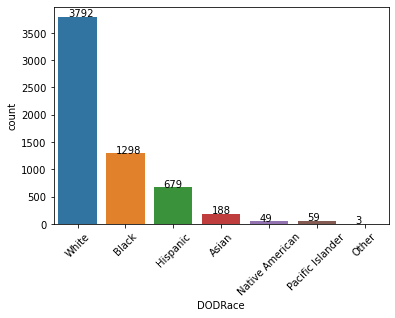

In [14]:
ax = sns.countplot(data.DODRace)             # We check target 
plt.xticks(rotation=45) 
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2,p.get_height()+1));


We have defined a function to see data with more than 1800 missing values (1/3 of which is empty); then we drop them:

In [15]:
drop_list =[]
for col in data:
  if data[col].isnull().sum()>1800:
    print(f"{col} = {data[col].isnull().sum()}")
    drop_list.append(col)
  
  
drop_list 

subjectid = 1986
Ethnicity = 4647
SubjectId = 4082


['subjectid', 'Ethnicity', 'SubjectId']

In [16]:
data.drop(drop_list, axis=1, inplace=True)   # Drop them

In [17]:
data.isnull().sum().any()

False

In [18]:
data.shape

(6068, 106)

Let's drop the unnecessary or redundant feature:

In [19]:
drop_list1 = [
    "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin",   
]

data.drop(drop_list1, axis=1, inplace=True)

In [20]:
data.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

We decided to drop the "Subject Numeric Race" column, which gives very detailed information about the ethnicity of the soldiers, to avoid datalekage

In [21]:
data.drop("SubjectNumericRace",axis=1,inplace=True)

We decided to delete anything below 500. We apply this to the target label as well. So only White, Black and Hispanic will remain in the target

In [22]:
data.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [23]:
data = data[(data["DODRace"] == "White") | (data["DODRace"] == "Black") |
                (data["DODRace"] == "Hispanic")]
data

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                                266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                                233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                                287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                                234            1347                    31

In [24]:
data.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [25]:
data.reset_index(drop=True, inplace=True)  # Because of the values we deleted, we need to index the data from scratch.

In [26]:
data

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                                266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                                233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                                287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                                234            1347                    31

Although we can't analyze the values in detail in the heatmap below, we can see that there is multicollinearity between the intensely red colored features.
But we will not deal with the problem of multicollinearity. Because Logistic Regression will solve this problem with regularization in the background. Multicollinearity has a lot of effect on feature importance.
Since the SVC model is a instance-based model, we will not be able to get feature importance in that model. So multicollinearity is not a problem for us

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

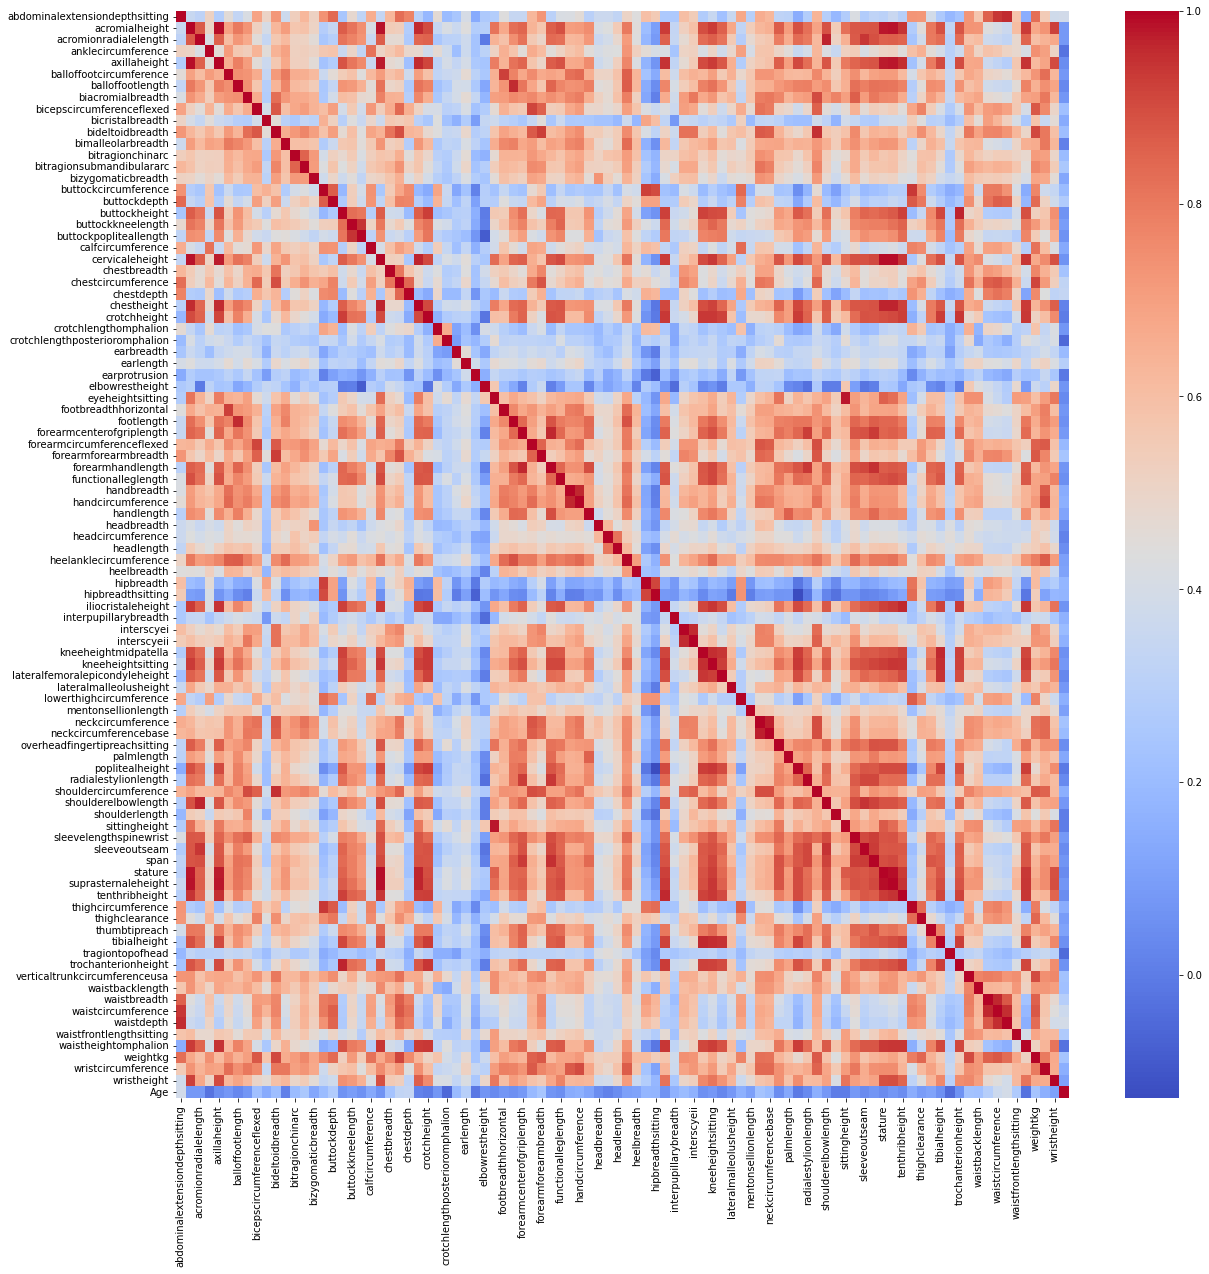

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap ="coolwarm")

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

Logistic Regression Gradient Descent-based,  SVM is a distance-based model. Get_dummies must be done for these models (we will not apply the dummy process in Tree-based models. Therefore, we will define new X and y in those models:

In [28]:
X = data.drop("DODRace",axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = data.DODRace

<IPython.core.display.Javascript object>

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify =y)

<IPython.core.display.Javascript object>

We added 'stratify =y' in case there is an imbalance in Target.

In [30]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 232)
Train target shape   :  (4615,)
Test features shape  :  (1154, 232)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [31]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

We defined the class_weight='balanced' parameter from the beginning, as we predicted an unbalanced situation in the target.

In [32]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
pipe_log_model = Pipeline(steps=operations)

In [33]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[238  12  10]
 [  6 107  23]
 [ 13  93 652]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   36   31]
 [  21  454   68]
 [  67  355 2612]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In the above scores, there is no imbalance between the Train and the Test set. It is seen that the scores of the Black class are very high. So, Black class has more distinctive features than others. There is a serious imbalance between values in the Hispanic class. In our next steps, we will work on improving the Precision, Recall and F1 scores of the Hispanic class. Since we are specifically interested in this class, we can use make_scorer.

In [34]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [35]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.604013
test_precision_Hispanic    0.498576
test_recall_Hispanic       0.769933
dtype: float64

### Logistic Model GridsearchCV

In [36]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [37]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [38]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,      # Find the best parameters to increase the scores of the Hispanic genre.
                              n_jobs=-1, cv=5)

In [39]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [40]:
log_model_grid.best_params_

{'log__C': 0.5, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [41]:
log_model_grid.best_score_

0.7751104315324499

In [42]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[237  14   9]
 [  6 109  21]
 [ 13  94 651]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.80      0.62       136
       White       0.96      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.90      0.86      0.87      1154


Train_Set
[[ 965   38   35]
 [  24  449   70]
 [  74  372 2588]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.52      0.83      0.64       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



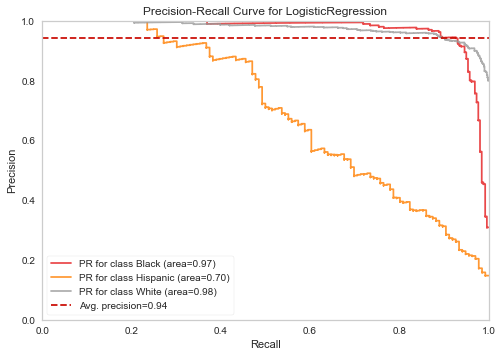

In [43]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],   # Tabloda isimler gorunsun diye bunu yazdik.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [44]:
viz.score_  #["Hispanic"] 

{'Black': 0.9719016028220795,
 'Hispanic': 0.7003529124826657,
 'White': 0.9758799944233977,
 'micro': 0.9418165019120016}

In [45]:
log_AP = viz.score_["Hispanic"]    # log model Hispanic classs Avg. precision score

In [46]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"] 
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])            # Hispanic f1 score
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])    # Hispanic recall score

## 2. SVC

### Vanilla SVC model 

In [47]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=42))]
pipe_svc_model = Pipeline(steps=operations_svc)

We obtained scores close to SVC scores with Logistic Regression.

In [48]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  15  10]
 [  6 105  25]
 [ 10 104 644]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.47      0.77      0.58       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 957   39   42]
 [  23  444   76]
 [  61  419 2554]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.82      0.61       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.89      0.86      0.87      4615



Cross Validate isleminden aldigimiz skorlarin tek seferlik skorlar ile yakin oldugunu soyleyebiliriz 

In [49]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.579695
test_precision_Hispanic    0.466467
test_recall_Hispanic       0.769966
dtype: float64

###  SVC Model GridsearchCV

In [50]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]    
}

In [51]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=42))]

In [52]:
model = Pipeline(steps=operations_svc)

In [53]:
svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [54]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

Grid Search found gamma, one of the best parameter values, as the default value of 'scale'; It increased the value of C to 2:

In [55]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

Grid Search found the best score as 0.78. A score close to the score we got with Cross Validation score

In [56]:
svm_model_grid.best_score_

0.7807339449541285

After the Grid Search process, we see that the precision value of the Hispanic class has increased a little more, and the other scores have not changed much. We approached the logistic model scores

In [57]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[237  15   8]
 [  6 107  23]
 [  7  97 654]]
              precision    recall  f1-score   support

       Black       0.95      0.91      0.93       260
    Hispanic       0.49      0.79      0.60       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.80      0.85      0.81      1154
weighted avg       0.90      0.86      0.88      1154


Train_Set
[[ 969   30   39]
 [  19  455   69]
 [  49  372 2613]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [58]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=42))]

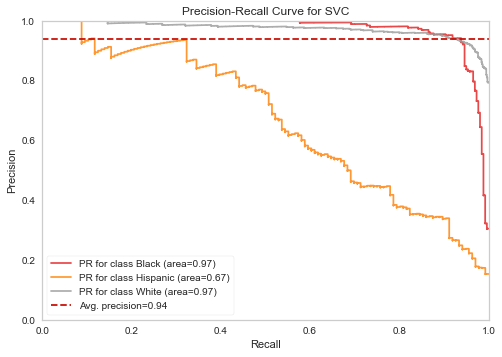

In [59]:
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [60]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

Dummies feature is not used in tree based models; OrdinalEncoder is used instead:

In [61]:
from sklearn.preprocessing import OrdinalEncoder

In [62]:
X2 = data.drop("DODRace",axis=1)          
y = data.DODRace                         

In [63]:
cat = X2.select_dtypes("object").columns
cat                                       

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [64]:
enc = OrdinalEncoder()   

In [65]:
X2[cat] = enc.fit_transform(X2[cat])  
X2.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                             234            1347                    310           

In [66]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42, stratify =y)

<IPython.core.display.Javascript object>

In [67]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


### Vanilla RF Model

In [68]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

In [69]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=42)

Although we made the balance, the recall and f1 scores of the test set of the Hispanic class turned out to be very bad. The scores in the train set are 100%, the test set scores are very bad. There is an overfitting condition.

In [70]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[184   1  75]
 [  8   5 123]
 [ 10   1 747]]
              precision    recall  f1-score   support

       Black       0.91      0.71      0.80       260
    Hispanic       0.71      0.04      0.07       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.81      0.58      0.58      1154
weighted avg       0.81      0.81      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [71]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.068078
test_precision_Hispanic    0.633333
test_recall_Hispanic       0.036633
dtype: float64

### RF Model GridsearchCV

In [72]:
param_grid = {'n_estimators':[400,500],
             'max_depth':[10,12,14,16]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
             

In [73]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [74]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [75]:
rf_grid_model.best_params_

{'max_depth': 10, 'n_estimators': 400}

In [76]:
rf_grid_model.best_score_

0.23751274209989806

The model first tries to pull the test set scores towards the train set while preventing overfitting; fails, the train set scores approximate the test set scores. No matter what we do to the Random Forest model at the moment, the scores will not improve much

In [77]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[201   7  52]
 [ 10  39  87]
 [ 17  32 709]]
              precision    recall  f1-score   support

       Black       0.88      0.77      0.82       260
    Hispanic       0.50      0.29      0.36       136
       White       0.84      0.94      0.88       758

    accuracy                           0.82      1154
   macro avg       0.74      0.67      0.69      1154
weighted avg       0.81      0.82      0.81      1154


Train_Set
[[1023    1   14]
 [   0  528   15]
 [   4   19 3011]]
              precision    recall  f1-score   support

       Black       1.00      0.99      0.99      1038
    Hispanic       0.96      0.97      0.97       543
       White       0.99      0.99      0.99      3034

    accuracy                           0.99      4615
   macro avg       0.98      0.98      0.98      4615
weighted avg       0.99      0.99      0.99      4615



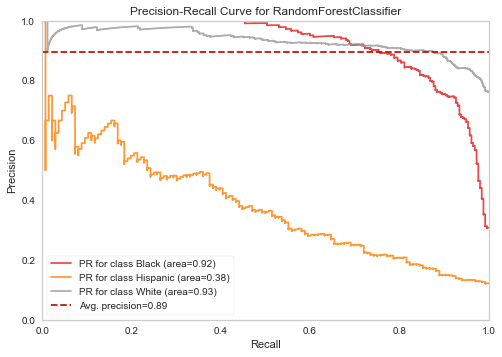

In [78]:
model = RandomForestClassifier(class_weight="balanced", random_state=42, max_depth=10, n_estimators = 400)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [79]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [80]:
xgb_model = XGBClassifier(random_state=42,eval_metric='mlogloss')

In [81]:
from sklearn.utils import class_weight

In [82]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights    # Grid Search' de bu degiskeni kullanacagiz.

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [83]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [84]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[221   9  30]
 [  7  66  63]
 [ 14  17 727]]
              precision    recall  f1-score   support

       Black       0.91      0.85      0.88       260
    Hispanic       0.72      0.49      0.58       136
       White       0.89      0.96      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.76      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [85]:
model = XGBClassifier(random_state=42,eval_metric='mlogloss')

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.542250
test_precision_Hispanic    0.703706
test_recall_Hispanic       0.443906
dtype: float64

### XGBoost Model GridsearchCV

In [86]:
comp = pd.DataFrame(classes_weights)

<IPython.core.display.Javascript object>

In [87]:
# y_train2.reset_index(drop=True)

In [88]:
comp["label"]= y_train2.reset_index(drop=True)

In [89]:
comp.groupby("label")[0].value_counts()

label     0       
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: 0, dtype: int64

In [90]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}      # colsample_bytree ---> max_feature ile ayni

In [91]:
xgb_model = XGBClassifier(random_state=42)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[11:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [92]:
xgb_grid_model.best_params_     #colsample_bytree ve subsample haric diger parametreler default degerlerinde :

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [93]:
xgb_grid_model.best_score_

0.6076282704723072

In [94]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[227  19  14]
 [ 11  94  31]
 [ 26 107 625]]
              precision    recall  f1-score   support

       Black       0.86      0.87      0.87       260
    Hispanic       0.43      0.69      0.53       136
       White       0.93      0.82      0.88       758

    accuracy                           0.82      1154
   macro avg       0.74      0.80      0.76      1154
weighted avg       0.86      0.82      0.83      1154


Train_Set
[[ 974   28   36]
 [  21  460   62]
 [  90  320 2624]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1038
    Hispanic       0.57      0.85      0.68       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.84      4615
weighted avg       0.90      0.88      0.89      4615



We can say that XGBoost and Random Forest gave very bad scores in this dataset.

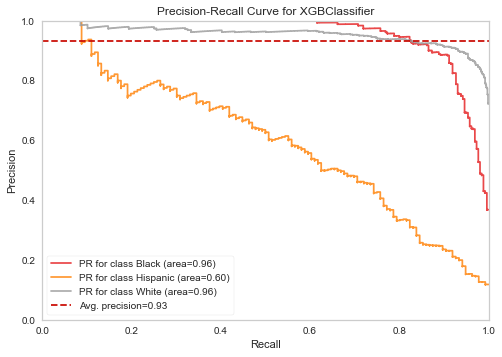

In [95]:
model = XGBClassifier(random_state=42, colsample_bytree=0.5, subsample=1, eval_metric='mlogloss')

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [96]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## Comparing Models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

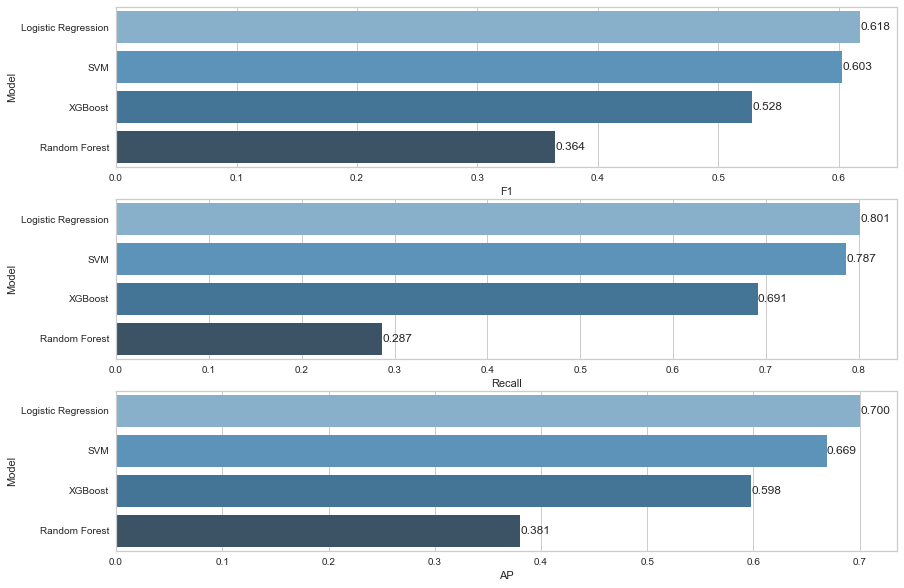

In [97]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})    # Dengesiz datasetlerinde modelin genel performansi.

def labels(ax):   # Sayilari yazdirmak icin.
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")        # f1 score
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")   # recall score
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")       # average precision score
labels(ax)
plt.show()

In f1 score and recall, Logistic model and SVM scores are close to each other; When we look at the overall performance (AP), we see that the Logistic Regression is slightly higher. Therefore, it makes sense to choose the Logistic Model. Even if the scores are the same, choosing an SVM model would not make sense. Because in this model, the working cost is high and we cannot do feature importance. We can make feature importance in Logistic Regression (Ridge-Lasso).

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [98]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
final_model = Pipeline(steps=operations)

In [99]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [100]:
final_model.predict(X.loc[[200]])

array(['Black'], dtype=object)

In [101]:
y[200]

'Black'

Our model, which we predicted with the data in line 200, predicts correctly.

# SMOTE

In [102]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [103]:
over = SMOTE(sampling_strategy={"Hispanic": 1250})
under = RandomUnderSampler(sampling_strategy={"White":2800})
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [104]:
y_resampled.value_counts()

White       2800
Hispanic    1250
Black       1038
Name: DODRace, dtype: int64

In [105]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

# SVC OVER/UNDER SAMPLING

In [106]:
param_grid = {'C': np.linspace(50,200,4),
              'decision_function_shape' : ['ovr'], #'ovo'
              'gamma': ["scale", "auto", 1,2],
              'kernel': ['rbf'],
              'class_weight':["balanced",None]}

<IPython.core.display.Javascript object>

In [107]:
f1_Hispanic =  make_scorer(f1_score, average=None, labels = ["Hispanic"])
f1_score_weighed = make_scorer(f1_score, average="weighted")

In [108]:
model = SVC()
svm_model_grid = GridSearchCV(model, param_grid, verbose=1, scoring=f1_score_weighed, refit=True,n_jobs=-1)

In [109]:
svm_model_grid.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 50., 100., 150., 200.]),
                         'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovr'],
                         'gamma': ['scale', 'auto', 1, 2], 'kernel': ['rbf']},
             scoring=make_scorer(f1_score, average=weighted), verbose=1)

In [110]:
svm_model_grid.best_params_

{'C': 200.0,
 'class_weight': None,
 'decision_function_shape': 'ovr',
 'gamma': 'scale',
 'kernel': 'rbf'}

[[217  25  18]
 [  7  75  54]
 [  6  57 695]]
              precision    recall  f1-score   support

       Black       0.94      0.83      0.89       260
    Hispanic       0.48      0.55      0.51       136
       White       0.91      0.92      0.91       758

    accuracy                           0.86      1154
   macro avg       0.78      0.77      0.77      1154
weighted avg       0.86      0.86      0.86      1154



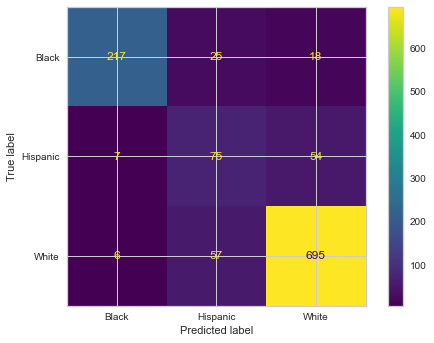

In [111]:
y_pred = svm_model_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svm_model_grid,X_test,y_test);

# Xgboost Over/ Under Sampling

In [113]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[6,8],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5],
              "colsample_bytree":[0.5, 1]}

In [114]:
xgb_model = XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring=f1_Hispanic, n_jobs = -1,refit=True, verbose = 2).fit(X_resampled, y_resampled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[12:08:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [115]:
xgb_grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 300,
 'subsample': 0.5}

[[221  17  22]
 [  8  68  60]
 [ 11  25 722]]
              precision    recall  f1-score   support

       Black       0.92      0.85      0.88       260
    Hispanic       0.62      0.50      0.55       136
       White       0.90      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.81      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154



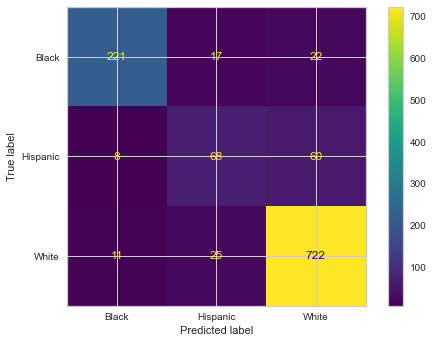

In [116]:
y_pred = xgb_grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_grid_model,X_test,y_test);

In [117]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7466616959003547

In [118]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.744121787993624

# SHAP

In [120]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [122]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[239  12   9]
 [  7 103  26]
 [ 16  93 649]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92       260
    Hispanic       0.50      0.76      0.60       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 969   38   31]
 [  18  452   73]
 [  77  350 2607]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.54      0.83      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [125]:
import shap
explainer = shap.Explainer(model_shap,X_train_scaled)
start_index = 200
end_index = 201
shap_values = explainer.shap_values(X_test_scaled[start_index:end_index])

In [126]:
shap_values

[array([[ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
          2.77581497e-01, -0.00000000e+00,  2.08502290e-01,
         -0.00000000e+00, -0.00000000e+00, -1.83586263e-01,
         -1.29188319e-01, -0.00000000e+00, -0.00000000e+00,
         -2.87471236e-01,  4.26847711e-01, -1.29599832e-02,
          0.00000000e+00, -6.95359893e-02,  8.12412588e-03,
         -1.52580301e-01, -4.21322350e-01, -0.00000000e+00,
         -0.00000000e+00,  1.03068082e-01,  2.26103478e-02,
         -3.23665232e-01, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00,  8.97400410e-03, -0.00000000e+00,
          1.87293339e-01,  1.15114989e-01,  0.00000000e+00,
          4.72754750e-02, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -3.97139123e-01, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -4.25678839e-01,  8.74967952e-03,
         -2.65507211e-01, -0.00000000e+00, -7.21990704e-01,
         -2.93715303e-01, -3.33302724e-0

In [127]:
print(shap_values[0].shape)

(1, 232)


In [128]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap.predict(X_test_scaled[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[0],
                shap_values[1],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

The log_model predicted: White


In [129]:
explainer.expected_value[1]

1.798808861319116

In [130]:
X_test_scaled[200]

array([0.33559322, 0.43575419, 0.59027778, 0.37398374, 0.44806517,
       0.20909091, 0.37234043, 0.37640449, 0.32824427, 0.51515152,
       0.37918216, 0.33333333, 0.40677966, 0.31034483, 0.5       ,
       0.48161121, 0.34254144, 0.51913876, 0.36964981, 0.36444444,
       0.37344398, 0.41698113, 0.41333333, 0.39793282, 0.4600939 ,
       0.37549407, 0.45368171, 0.34890966, 0.38222222, 0.        ,
       0.34285714, 0.33333333, 0.5410628 , 0.49206349, 0.26530612,
       0.38053097, 0.42405063, 0.31770833, 0.28109453, 0.45689655,
       0.56340956, 0.21052632, 0.25      , 0.30952381, 0.45652174,
       0.41353383, 0.35087719, 0.30935252, 0.35      , 0.50239234,
       0.48      , 0.51487414, 0.38461538, 0.35335689, 0.32217573,
       0.508     , 0.45914397, 0.53305785, 0.34782609, 0.36912752,
       0.33333333, 0.25941423, 0.32921811, 0.42537313, 0.32608696,
       0.37727273, 0.44025157, 0.35262206, 0.54605263, 0.28205128,
       0.5       , 0.49526066, 0.55518395, 0.55889724, 0.40950

In [131]:
shap.force_plot(explainer.expected_value[0],
                shap_values[0],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns)

In [132]:
shap.force_plot(explainer.expected_value[2],
                shap_values[2],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns)

# Shap values for all data

In [133]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

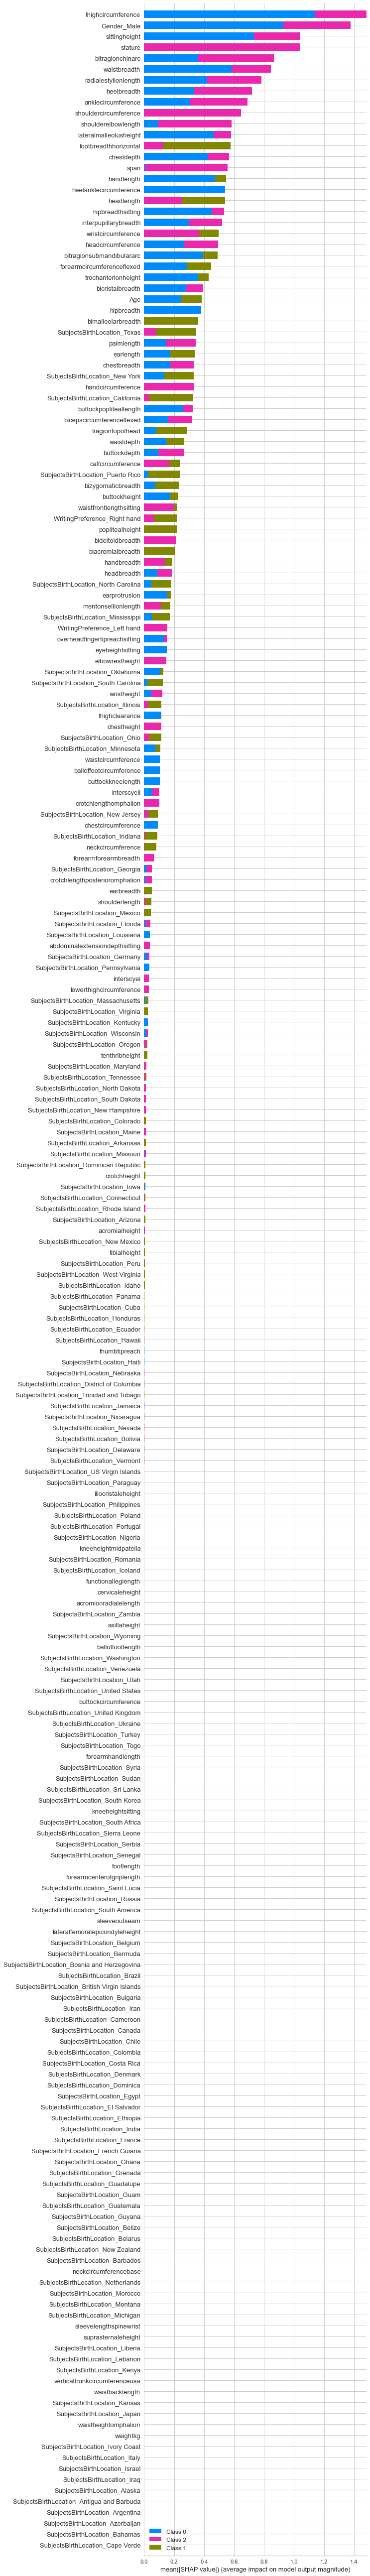

In [134]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

In [135]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [137]:
X3 = data[hispanic]
X3 = pd.get_dummies(data=X3, drop_first=True)
y = data.DODRace

<IPython.core.display.Javascript object>

In [138]:
X3.shape

(5769, 154)

In [139]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=42, stratify =y)

<IPython.core.display.Javascript object>

In [140]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

In [141]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [142]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[206  21  33]
 [ 11 102  23]
 [ 79 120 559]]
              precision    recall  f1-score   support

       Black       0.70      0.79      0.74       260
    Hispanic       0.42      0.75      0.54       136
       White       0.91      0.74      0.81       758

    accuracy                           0.75      1154
   macro avg       0.67      0.76      0.70      1154
weighted avg       0.80      0.75      0.77      1154


Train_Set
[[ 875   43  120]
 [  30  431   82]
 [ 391  500 2143]]
              precision    recall  f1-score   support

       Black       0.68      0.84      0.75      1038
    Hispanic       0.44      0.79      0.57       543
       White       0.91      0.71      0.80      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.78      0.70      4615
weighted avg       0.80      0.75      0.76      4615



In [143]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.544538
test_precision_Hispanic    0.429114
test_recall_Hispanic       0.747946
dtype: float64

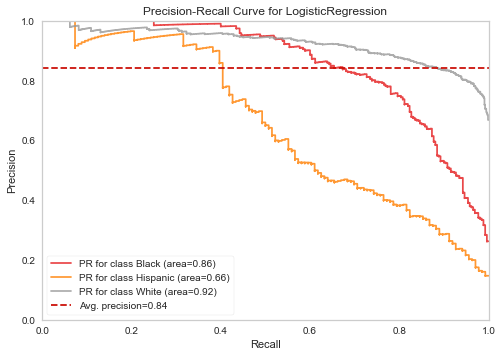

In [144]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();